In [5]:
import sys; sys.argv=['']; del sys
import os
from six.moves import cPickle
import time
import misc.utils as utils
import opts
import models
from dataloader import Dataloader


opt = opts.parse_opt()
loader = Dataloader(opt)

Dataloader loading json file:  ./data/metadata.json
vocab size is:  10303
Dataloader loading h5 file:  ./data/h5data_fc.h5 ./data/h5data_att.h5 ./data/h5data_label.h5
read 123287 image features
max sequence length in data is  16
assigned 113287 images to split train
assigned 5000 images to split val
assigned 5000 images to split test


In [6]:
# 加载训练数据
data = loader.get_batch('train')

buf = [data['fc_feats'], data['att_feats'], data['captions'], data['masks']]
fc_feats, att_feats, captions, masks = buf

In [7]:
vocab = {int(k): v for k, v in loader.idx2word.items()}
data['infos']

[{'id': 522418, 'idx': 1},
 {'id': 318219, 'idx': 3},
 {'id': 554625, 'idx': 4},
 {'id': 397133, 'idx': 5},
 {'id': 574769, 'idx': 6},
 {'id': 309022, 'idx': 8},
 {'id': 5802, 'idx': 9},
 {'id': 222564, 'idx': 10},
 {'id': 118113, 'idx': 11},
 {'id': 193271, 'idx': 12}]

In [8]:
def decode(s, vocab):
    output = []
    for w in s:
        if w == 0:
            break
        output.append(vocab[w])
    print(' '.join(output))

In [18]:
from matplotlib.pyplot import imshow
import  matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

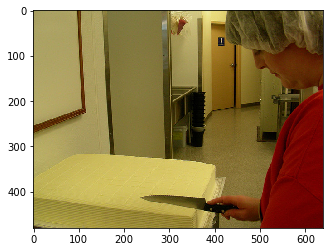


a woman wearing a hair net cutting a large sheet cake
a woman marking a cake with the back of a chefs knife
a woman cutting a large white sheet cake
there is a woman that is cutting a white cake
a woman wearing a net on her head cutting a cake


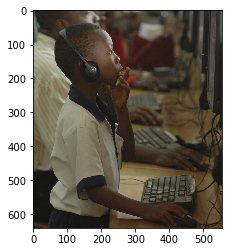


a young boy stares up at the computer monitor
a young boy stares up at the computer monitor
a young kid with head phones on using a computer
he is listening intently to the computer at school
a young kid with head phones on using a computer


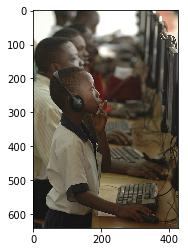


a boy wearing headphones using one computer in a long row of computers
a little boy with earphones on listening to something
a little boy with earphones on listening to something
a boy wearing headphones using one computer in a long row of computers
children sitting at computer stations on a long table


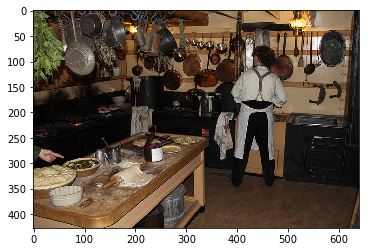


a baker is working in the kitchen rolling dough
a man is in a kitchen making pizzas
a baker is working in the kitchen rolling dough
man in apron standing on front of oven with pans and <UNK>
a table with pies being made and a person standing near a wall with pots and


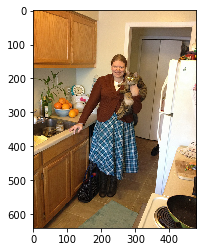


a woman is holding a cat in her kitchen
a woman is holding a cat in her kitchen
a girl smiles as she holds a cat and wears a brightly colored skirt
a girl smiles as she holds a cat and wears a brightly colored skirt
a woman is working in a kitchen carrying a soft toy


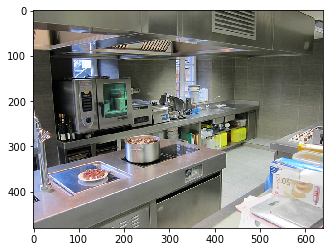


some food sits in a pot in a kitchen
a kitchen with a sink and many cooking machines and a pot of food
a kitchen with a sink and many cooking machines and a pot of food
a commercial stainless kitchen with a pot of food cooking
a kitchen has all stainless steel appliances and counters


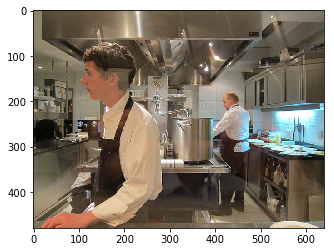


two people standing around in a large kitchen
two men in white shirts in a large steel kitchen
a commercial kitchen with two men working to prepare several plates
a commercial kitchen with two men working to prepare several plates
two men in white shirts in a large steel kitchen


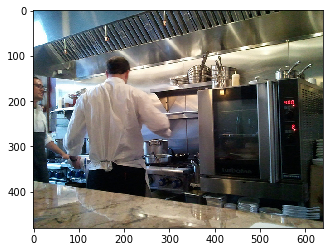


two men that are standing in a kitchen
two cooks are cooking the food someone ordered at this restaurant
two men that are standing in a kitchen
two men that are standing in a kitchen
two cooks are cooking the food someone ordered at this restaurant


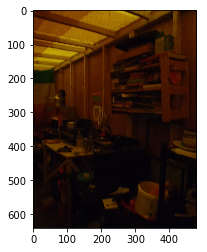


a cluttered room with a table and shelf on the wall
a cluttered room with a table and shelf on the wall
a dim lit room consisting of many objects put together
a view of a messy room with shelves on the wall
a view of a messy room with shelves on the wall


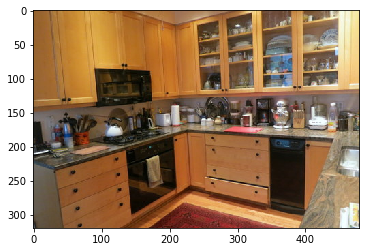


a kitchen with wooden cabinets and black appliances
a kitchen with wooden cabinets and black appliances
a kitchen filled with black appliances and lots of counter top space
a kitchen filled with black appliances and lots of counter top space
some brown cabinets a black oven a tea kettle and a microwave


In [20]:
temp_info = data['infos']
temp_cap = captions

cnt = 0
for i, c in enumerate(temp_cap):
    if i % 5 == 0:
        cnt += 1
        f = plt.figure(cnt)
        image_file = './coco/val2014/COCO_val2014_%012d.jpg' % temp_info[i//5]['id']
        pil_im = Image.open(image_file, 'r')
        imshow(np.asarray(pil_im))
        plt.show()
        print()
    decode(c[1:], vocab)